# Read Into Data

In [58]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [59]:
# read the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
stores = pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")

In [60]:
# We explore the train data first
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# Data Distribution Exploration

## Train.csv

In [61]:
# We explore the train data first
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [62]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


We find that there are some store-department combinations have negative weekly sales. There is no missing value in this dataset.

Next we find out the max number of weeks the data has and how many store-department combinations have max number of weeks.

In [64]:
# cast the Date variable to type Date
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [65]:
date_count = train.groupby(['Store', 'Dept']).size()
date_count_df = date_count.to_frame(name = 'size').reset_index()

In [66]:
date_count_df["size"].describe()

count    3331.000000
mean      126.559592
std        40.212763
min         1.000000
25%       143.000000
50%       143.000000
75%       143.000000
max       143.000000
Name: size, dtype: float64

There are a max of 143 weeks in the data. Obviously not all store-department combinations have max number of weeks. Let's plot it.

(array([ 184.,   75.,   35.,   36.,   18.,   23.,   23.,   35.,   23.,
          31.,   40.,   59., 2749.]),
 array([  1.        ,  11.92307692,  22.84615385,  33.76923077,
         44.69230769,  55.61538462,  66.53846154,  77.46153846,
         88.38461538,  99.30769231, 110.23076923, 121.15384615,
        132.07692308, 143.        ]),
 <a list of 13 Patch objects>)

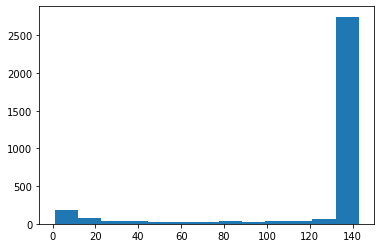

In [67]:
plt.hist(date_count_df['size'], bins = 'auto')

We find that almost all store-department combinations have (nearly) max number of weeks. Some have only a few weeks.

We now explore the `IsHoliday` variable.

In [68]:
train['IsHoliday']

0         False
1          True
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Name: IsHoliday, Length: 421570, dtype: bool

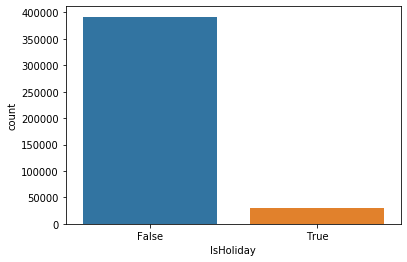

In [69]:
sns.countplot("IsHoliday", data = train)

Only a few weeks are holidays.

**(Possibly later we need to deal with inbalance of categorical data)**

## features.csv

In [70]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [71]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [72]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [73]:
# transform Date
features['Date'] = pd.to_datetime(features['Date'])

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


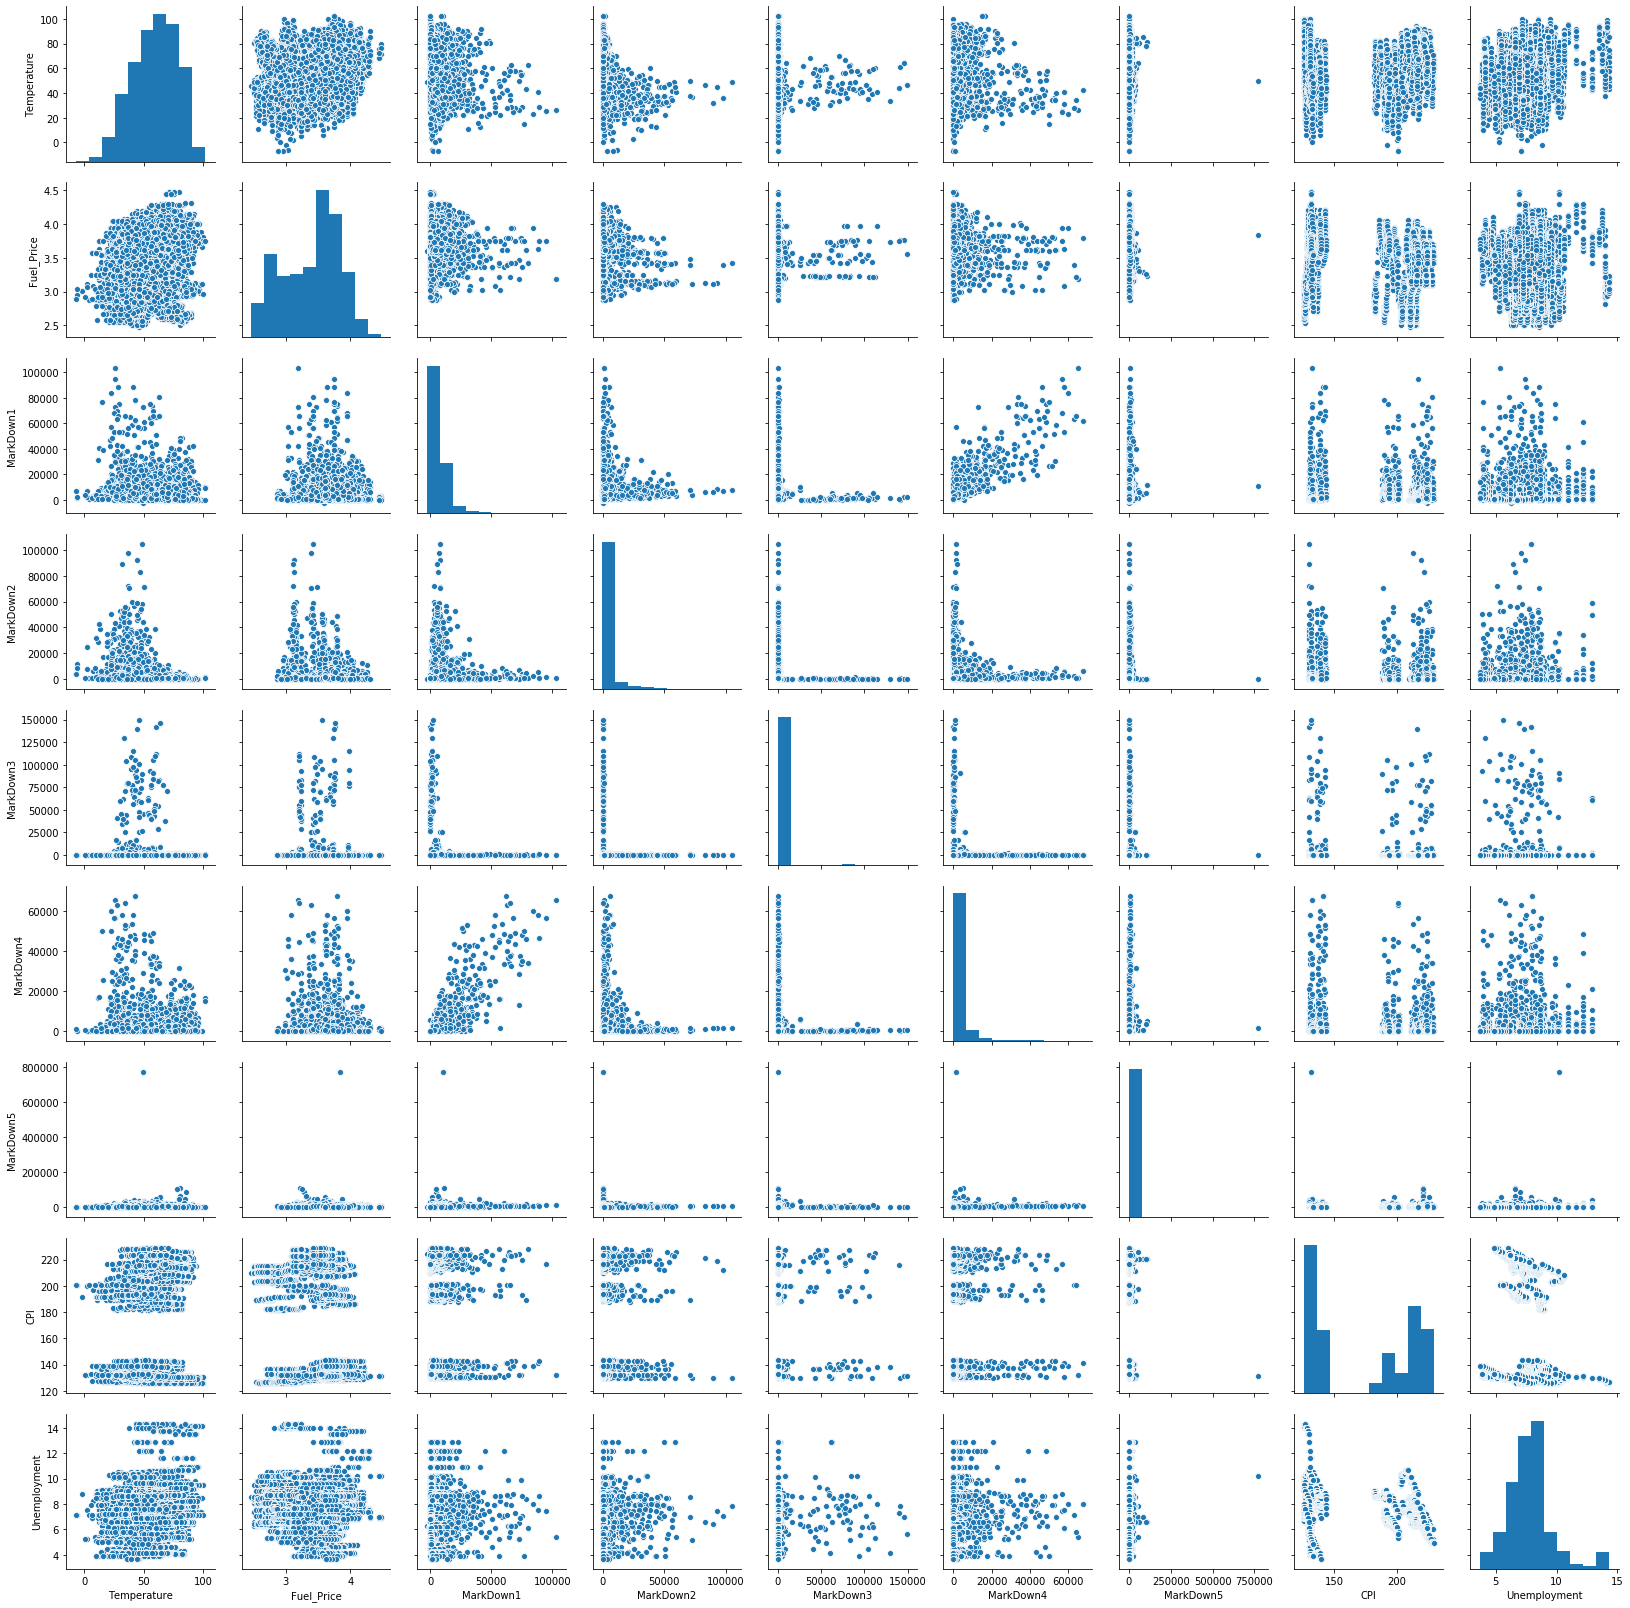

In [74]:
# present relationship between continuous features 
sns.pairplot(features.iloc[:,2:-1])

### check missing values

In [75]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### check the distributions of continuous variables

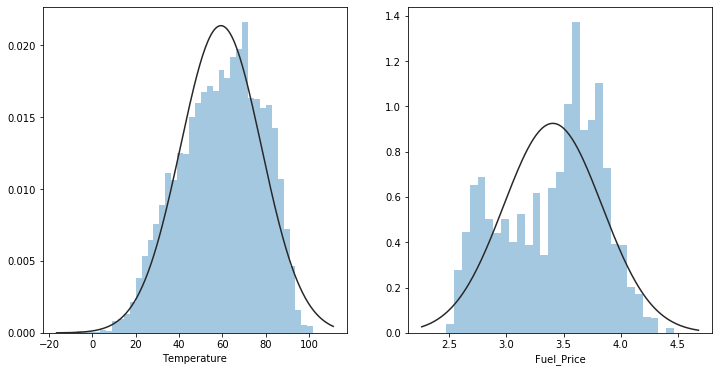

In [76]:
# distribution of features without missing values: Temperature and Fuel Price
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(features['Temperature'], fit=stats.norm, kde=False, ax=axes[0])
sns.distplot(features['Fuel_Price'], fit=stats.norm, kde=False, ax=axes[1])

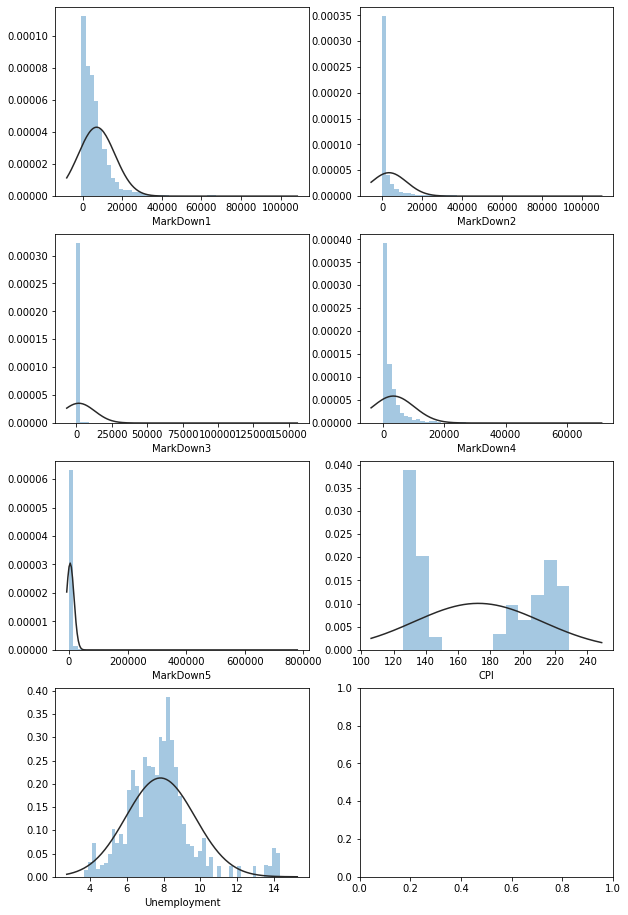

In [77]:
# distribution of features with missing values: MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment

fig, axes = plt.subplots(4,2,figsize=(10,16))
sns.distplot(features['MarkDown1'][features['MarkDown1'].notna()], fit=stats.norm, kde=False, ax=axes[0,0])
sns.distplot(features['MarkDown2'][features['MarkDown2'].notna()], fit=stats.norm, kde=False, ax=axes[0,1])
sns.distplot(features['MarkDown3'][features['MarkDown3'].notna()], fit=stats.norm, kde=False, ax=axes[1,0])
sns.distplot(features['MarkDown4'][features['MarkDown4'].notna()], fit=stats.norm, kde=False, ax=axes[1,1])
sns.distplot(features['MarkDown5'][features['MarkDown5'].notna()], fit=stats.norm, kde=False, ax=axes[2,0])
sns.distplot(features['CPI'][features['CPI'].notna()], fit=stats.norm, kde=False, ax=axes[2,1])
sns.distplot(features['Unemployment'][features['Unemployment'].notna()], fit=stats.norm, kde=False, ax=axes[3,0])

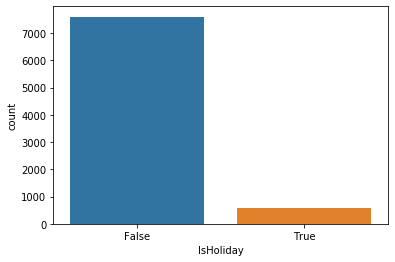

In [78]:
sns.countplot(features['IsHoliday'])

There are many missing values for **MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5** features, which might consider filling into na values by filling 0, std, mean, median, or forward and backward, or directly deleting away.  
Other features having missing values can be filled with std,mean,median.  

`IsHoliday` has inbalanced values...



## stores.csv

In [79]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [80]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [81]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


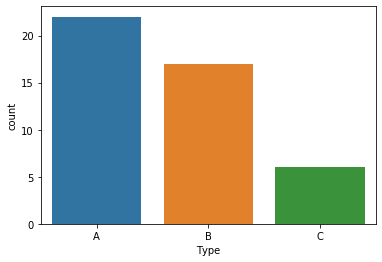

In [82]:
# Type categorical variable
sns.countplot(stores['Type'])

There are three types for `Type` vairable: A, B, and C.  
Later in modelling, we need to **one-hot encode** this variable as order does not matter. 

In [83]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

There is no missing value in stores.csv which is good.

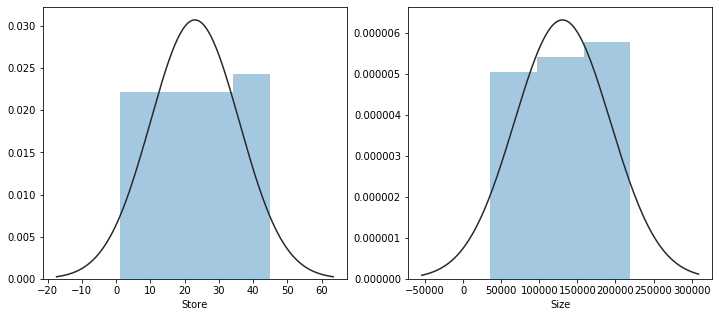

In [84]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.distplot(stores['Store'], fit=stats.norm, kde=False, ax=axes[0])
sns.distplot(stores['Size'], fit=stats.norm, kde=False, ax=axes[1])

The size of store is distributed within 45000-225000.

# Data Cleaning/Preprocessing

In this step, we will deal with our features data, such as filling missing values, normalizing features data into the same scales, encoding categorical variables if necessary.    
Combining dataset is also one of our options if getting more features is necessary.


## Combine train.csv with features.csv and stores.csv

In [85]:
dataset = pd.merge(train,features,on=['Store','Date'])
dataset = pd.merge(dataset,stores,on=['Store'])

In [86]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [87]:
dataset.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday_y     421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 52.3+ MB


In [89]:
values = {'MarkDown1': 0, 'MarkDown2': 0, 'MarkDown3': 0, 'MarkDown4': 0, 'MarkDown5': 0, 
          'CPI': dataset.CPI.mean(), 'Unemployment':dataset.Unemployment.mean()}
dataset = dataset.fillna(value=values)

In [90]:
dataset.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

## Combine test.csv with features.csv and stores.csv

In [91]:
test_set = pd.merge(test,features,on=['Store','Date'])
test_set = pd.merge(test_set,stores,on=['Store'])

In [92]:
test_set.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday_x         0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
IsHoliday_y         0
Type                0
Size                0
dtype: int64

In [93]:
test_set = test_set.fillna(value=values)

# Perform One-hot Encoding on `Type`, `IsHoliday_x`, `IsHoliday_y`.

In [94]:
type_df = pd.DataFrame({'Type': ['A', 'B', 'C']})

dataset = pd.concat([dataset, pd.get_dummies(dataset['Type'], prefix = 'Type')], axis = 1)
dataset.drop(['Type'],axis=1, inplace=True)

test_set = pd.concat([test_set, pd.get_dummies(test_set['Type'], prefix = 'Type')], axis = 1)
test_set.drop(['Type'],axis=1, inplace=True)

In [95]:
dataset['IsHoliday_x'] = dataset['IsHoliday_x'].map({True: 1, False: 0})
dataset['IsHoliday_y'] = dataset['IsHoliday_y'].map({True: 1, False: 0})

test_set['IsHoliday_x'] = test_set['IsHoliday_x'].map({True: 1, False: 0})
test_set['IsHoliday_y'] = test_set['IsHoliday_y'].map({True: 1, False: 0})

In [96]:
categorical_var = ['Type_A', 'Type_B', 'Type_C', 'IsHoliday_x', 'IsHoliday_y']
dataset[categorical_var] = dataset[categorical_var].astype('category')
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Size,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,1,0,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,1,0,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,1,0,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,1,0,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,1,0,0


# Correlation Check

In [97]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1,0.0240037,-0.085195,-0.0500969,0.0652902,-0.0598441,-0.0338291,-0.0203307,-0.0427245,-0.0124515,-0.211088,0.208552,-0.182881
Dept,0.0240037,1,0.148032,0.00443652,0.00357198,0.00149414,0.000586856,0.00147547,0.00193731,0.00266803,-0.00747739,0.00783677,-0.00296646
Weekly_Sales,-0.085195,0.148032,1,-0.00231245,-0.000120296,0.0471723,0.0207165,0.038562,0.0374672,0.0504653,-0.0209213,-0.0258637,0.243828
Temperature,-0.0500969,0.00443652,-0.00231245,1,0.143859,-0.0264151,-0.179672,-0.0560263,-0.0502809,-0.0147524,0.182112,0.0967302,-0.0583129
Fuel_Price,0.0652902,0.00357198,-0.000120296,0.143859,1,0.297056,0.0291532,0.0186149,0.166622,0.21542,-0.16421,-0.0338527,0.00336119
MarkDown1,-0.0598441,0.00149414,0.0471723,-0.0264151,0.297056,1,0.174868,-0.0144109,0.838904,0.41505,0.0109148,-0.105168,0.169788
MarkDown2,-0.0338291,0.000586856,0.0207165,-0.179672,0.0291532,0.174868,1,-0.00608023,0.11325,0.131735,-0.0035539,-0.0414273,0.0783722
MarkDown3,-0.0203307,0.00147547,0.038562,-0.0560263,0.0186149,-0.0144109,-0.00608023,1,-0.0120201,0.0424712,-0.00583883,-0.0180776,0.0336414
MarkDown4,-0.0427245,0.00193731,0.0374672,-0.0502809,0.166622,0.838904,0.11325,-0.0120201,1,0.30337,-0.00204714,-0.0765128,0.127334
MarkDown5,-0.0124515,0.00266803,0.0504653,-0.0147524,0.21542,0.41505,0.131735,0.0424712,0.30337,1,0.0679059,-0.120406,0.153011


`Markdown1` And `Markdown4`, `Markdown5` have high correlations with each other. they also have high siginificant correlation with `Fuel_Price`. Also, several other variables, like `CPI` and `Unemployment`, `Store` and `Unemployment` seem to be correlated.

# Modeling

Multiple machine learning models will be used to predict our target variables, sales.  
We may consider two alternatives before entering machine learning training, with PCA and without PCA.   

In [98]:
import numpy as np
from sklearn.preprocessing import StandardScaler

features = ['Store', 'Dept',  'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size']
x_train = dataset.loc[:, features].values
y_train = dataset.loc[:,['Weekly_Sales']].values
x_test = test_set.loc[:, features].values

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [99]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents = pca.fit_transform(x_train)

95% of the variance amounts to 11 principal components.

In [100]:
pca.n_components_

11

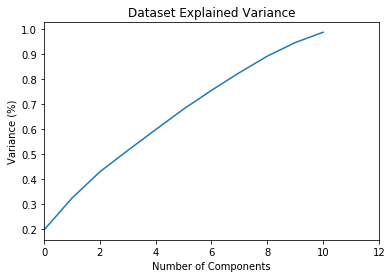

In [101]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,12)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [102]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [103]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train_pca, y_train)
reg.predict(x_test_pca)

array([[13252.006537  ],
       [13363.40774667],
       [13474.80895635],
       ...,
       [18078.54039143],
       [18301.34281078],
       [18412.74402046]])

# Results/Conclusions